In [7]:
# User: insert the location of your oscFit installation
import sys
sys.path.append('/Users/trwood/oscFit3D_v2.0_Tania/modules')

import numpy as np
import matplotlib.pyplot as plt
import jp_mpl as jplot
import sys, os

import dataLoader as dt
reload(dt)
from copy import deepcopy

In [8]:
my_edges = [10**np.linspace(0.8, 2.3, 9),
            np.arccos(np.linspace(-1,0.,9))[::-1],
            np.concatenate((np.linspace(0,1.4,3)[:-1], [np.inf]))]

In [3]:
loader = dt.dataLoader(bin_edges=my_edges,
                    observables = ['reco_energy', 'reco_zenith', 'pid'],
                    user = 'jpall_TyDetector', 
                    LEaxis = [],#np.linspace(0.5, 3.3, 61),
                    weight_keys = ['weight_e', 'weight_mu'], 
                    break_energy = 1000.,
                    table_nbins = 0,
                    verbose = False)


 ************************************ 
 **** oscFit3D v1.0 - dataLoader ****
 ************************************
dataLoader: Initializing user jpall_TyDetector
dataLoader: MC loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Loading systematic variations using default values.


/afs/ifh.de/user/y/yanezjua/oscFit_trunk/modules/dataLoader.py:46: RuntimeWarning: invalid value encountered in greater_equal
  sel_bool *= (in_dict[cut_key] >= np.min(self.extra_cuts[cut_key])) *\
/afs/ifh.de/user/y/yanezjua/oscFit_trunk/modules/dataLoader.py:47: RuntimeWarning: invalid value encountered in less
  (in_dict[cut_key] < np.max(self.extra_cuts[cut_key]))


In [4]:
settings = {  'dm31':                     0.0026, 
                                      'theta23':                  0.8,
                                      'theta13':                  0.155,
                                      'dcp':                      np.pi/2.,
                                      'mix_angle':                1., 
                                      'norm_nu':                  2.6, # In years
                                      'norm_e':                   1.,
                                      'norm_tau':                 1.,
                                      'norm_noise':               1.,
                                      'noise_f':                  False, #Set either a normalization or fraction
                                      'norm_nc':                  1.,
                                      'norm_atmmu':               0., 
                                      'atmmu_f':                  False, #Set either a normalization or fraction
                                      'nu_nubar':                 1., #
                                      'nubar_ratio':              0.,
                                      'uphor_ratio':              0.,
                                      'gamma':                    0.05, 
                                      'axm_qe':                   0.,
                                      'axm_res':                  0.,
                                      'pid_bias':                 0.0,
                                      'domeff':                   1., 
                                      'hole_ice':                 0.03, 
                                      'hi_fwd':                   1.,
                                      'had_escale':               1.,
                                      'atmmu_template':           'data',
                                      'simulation':               'baseline', 
                                      'oscMode':                  'Vacuum',
                                      'oscTables':                False,
                                      'ma_variations':            True,
                                      'add_detector_systematics': True, 
                                      'dm41':                     1.0,
                                      'theta24':                  0.0, 
                                      'theta34':                  0.0}

fnominal = loader.loadMCasData(settings,statistical_fluctuations=False)
print np.sum(fnominal)

dataLoader: atmmu_norm  0.0 , noise_norm 1.0
19542.697881


In [5]:
print fnominal

[[[  35.96   89.67]
  [  39.51  131.77]
  [  36.87  131.08]
  [  55.62  162.05]
  [  62.16  156.11]
  [  77.08  168.92]
  [  97.22  124.42]
  [ 114.86   27.81]]

 [[  97.81  164.3 ]
  [ 109.96  222.22]
  [ 100.25  268.7 ]
  [ 112.35  237.41]
  [ 119.31  204.62]
  [ 137.52  191.94]
  [ 152.78  156.04]
  [ 177.74   44.05]]

 [[ 175.15  217.67]
  [ 209.81  280.52]
  [ 181.23  321.02]
  [ 154.2   274.17]
  [ 163.5   215.98]
  [ 137.21  184.46]
  [ 147.43  121.75]
  [ 175.31   32.47]]

 [[ 219.78  231.46]
  [ 252.26  322.56]
  [ 239.59  319.91]
  [ 213.73  282.86]
  [ 193.58  203.78]
  [ 158.05  136.89]
  [ 137.31   74.92]
  [ 133.78   23.33]]

 [[ 236.59  216.73]
  [ 267.53  304.88]
  [ 283.47  305.95]
  [ 263.57  261.5 ]
  [ 235.64  172.15]
  [ 177.76   94.8 ]
  [ 154.44   61.48]
  [ 132.18   16.67]]

 [[ 215.75  179.48]
  [ 266.41  238.55]
  [ 232.4   271.33]
  [ 236.6   208.41]
  [ 229.07  136.76]
  [ 178.92   79.37]
  [ 149.07   49.86]
  [ 120.89   13.48]]

 [[ 151.94  145.1 ]
  [ 171.

In [6]:
var_list = {}
var_histos = {}

In [7]:
var_list = {'dm31':[0.0023, 0.0027],
            'theta23':[np.arcsin(np.sqrt(0.41)), np.arcsin(np.sqrt(0.62))],
            'axm_qe': [-1, 1],
            'axm_res':[-1, 1],
            #'had_escale':[0.95, 1.05],
            'gamma':[0., +0.1],
            'nubar_ratio':[-1.0, 1.],
            'uphor_ratio':[-1.0, 1.],
            'domeff':[0.9, 1.1],
            'pid_bias':[-0.05, 0.05],
            'hole_ice':[0.01, 0.03],
            'hi_fwd':[-5., 2.],
            'norm_atmmu':[0.02, 0.05],
            'norm_e':[0.8, 1.2],
            'norm_nc':[0.8, 1.2],
            }
print np.sum(fnominal)
var_histos = {}
for one_var in var_list.keys():
    var_histos[one_var] = []
    mod_settings = deepcopy(settings)
    mod_settings[one_var] = var_list[one_var][0]
    var_histos[one_var].append(loader.loadMCasData(mod_settings))
    mod_settings[one_var] = var_list[one_var][1]
    var_histos[one_var].append(loader.loadMCasData(mod_settings))
    
    print one_var, np.sum(var_histos[one_var][0])
    
    for i in range(len(var_histos[one_var])):
        var_histos[one_var][i] *= np.sum(fnominal)/np.sum(var_histos[one_var][i]) 

        
print 'Ready'

19542.697881
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
axm_res 19201.9739192
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
pid_bias 19440.7796901
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
nubar_ratio 17727.175567
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
hi_fwd 17930.7096178
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
norm_nc 19110.6739227
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
domeff 17620.6552497
dataLoader: atmmu_norm  0.02 , noise_norm 1.0
dataLoader: atmmu_norm  0.05 , noise_norm 1.0
norm_atmmu 19671.217881
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
hole_ice 19968.2660047
dataLoader: atmmu_norm  0.0 , noise_norm 1.0
dataLoader: atmmu_norm  0.0 , noise_nor

In [8]:
# The two neutrino approximation
var_list['mix_angle'] = [1.07, 0.93]
mod_settings = deepcopy(settings)
one_var = 'mix_angle'
mod_settings['oscMode']   = 'TwoNeutrino'
var_histos[one_var] = []
mod_settings[one_var] = 1.07
var_histos[one_var].append(loader.loadMCasData(mod_settings))
mod_settings[one_var] = 0.93
var_histos[one_var].append(loader.loadMCasData(mod_settings))
for i in range(len(var_histos[one_var])):
    var_histos[one_var][i] *= np.sum(fnominal)/np.sum(var_histos[one_var][i])

dataLoader: atmmu_norm  0.0 , noise_norm 1.0
dataLoader: atmmu_norm  0.0 , noise_norm 1.0


In [9]:
skeys = var_list.keys()
skeys.sort()

mybin_edges = [[],[],[]]
mybin_edges[0] = np.log10(loader.bin_edges[0])
mybin_edges[1] = np.cos(loader.bin_edges[1])
mybin_edges[2] = loader.bin_edges[2]

def doFigures():
    ppfigure = 3
    mycolors = ['r','g','b','m']
    nfigs = int(np.ceil(1.*len(var_list.keys())/ppfigure))
    all_figs = []
    counter = 0
    for i in range(nfigs):
        all_figs.append(plt.figure())
        for j in range(ppfigure):
            this_key = skeys[counter]
            jplot.unfilledBar(myxaxis, this_axis[this_key][0]/snominal, color = mycolors[j], label = this_key)
            jplot.unfilledBar(myxaxis, this_axis[this_key][1]/snominal, color = mycolors[j], linestyle='--')
            counter += 1
            if counter == len(var_list.keys()):
                break
        plt.legend(loc=0, ncol=2)
        plt.plot(myxaxis, [1]*len(myxaxis), '--k')
        #plt.xscale('log')
        plt.ylim([0.9, 1.1])
        #print counter
        if counter == len(var_list.keys()):
            return



Everything as a function of Ereco


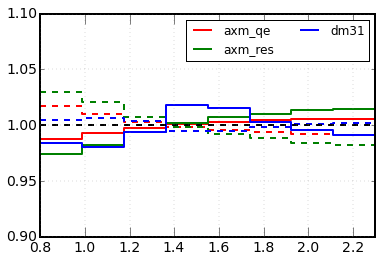

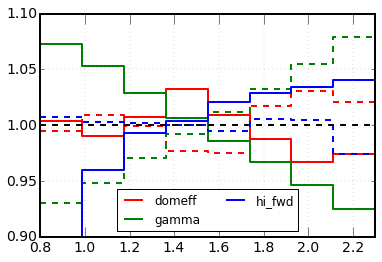

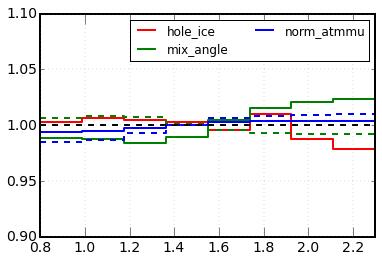

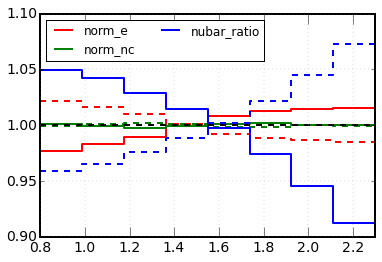

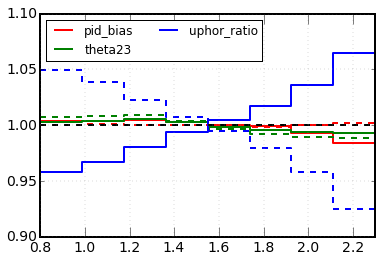

In [10]:
print 'Everything as a function of Ereco'
myaxis = (1,2)
myxaxis = mybin_edges[0]

this_axis = {}
snominal = np.sum(fnominal, axis=myaxis)

for one_var in skeys:
    this_axis[one_var] = []
    for i in range(len(var_histos[one_var])):
        this_axis[one_var].append(np.sum(var_histos[one_var][i], axis=myaxis))
doFigures()
        

Everything as a function of Zreco


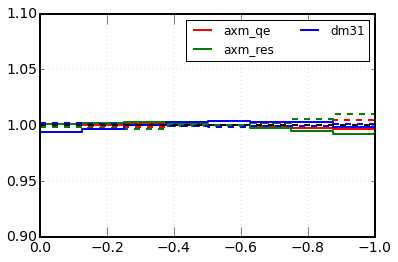

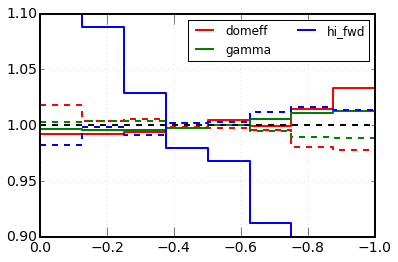

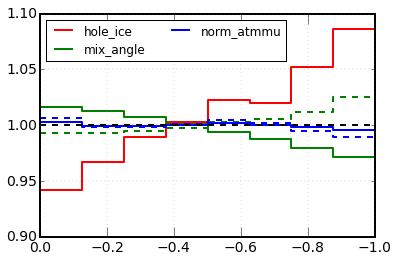

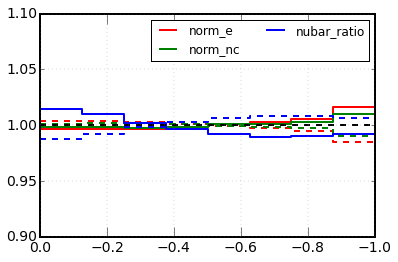

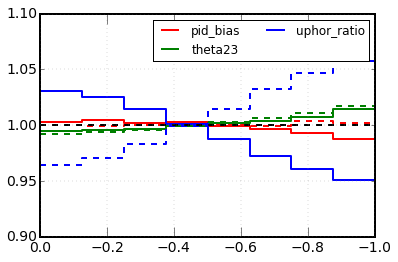

In [11]:
print 'Everything as a function of Zreco'

myaxis = (0,2)
myxaxis = mybin_edges[1]

this_axis = {}
snominal = np.sum(fnominal, axis=myaxis)

for one_var in var_list.keys():
    this_axis[one_var] = []
    for i in range(len(var_histos[one_var])):
        this_axis[one_var].append(np.sum(var_histos[one_var][i], axis=myaxis))
doFigures()    

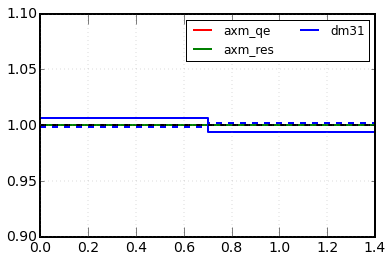

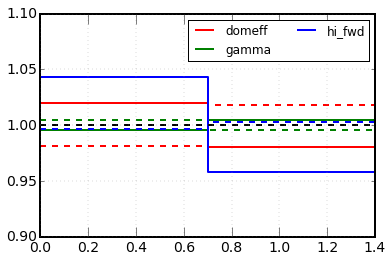

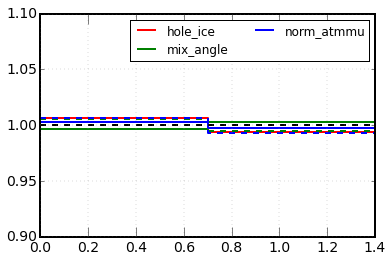

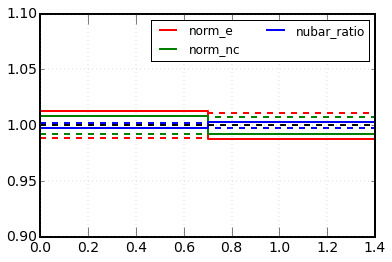

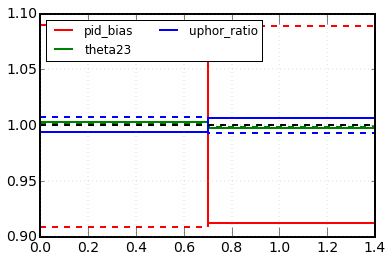

In [12]:
myaxis = (0,1)
myxaxis = mybin_edges[2]

this_axis = {}
snominal = np.sum(fnominal, axis=myaxis)

for one_var in var_list.keys():
    this_axis[one_var] = []
    for i in range(len(var_histos[one_var])):
        this_axis[one_var].append(np.sum(var_histos[one_var][i], axis=myaxis))
doFigures()       

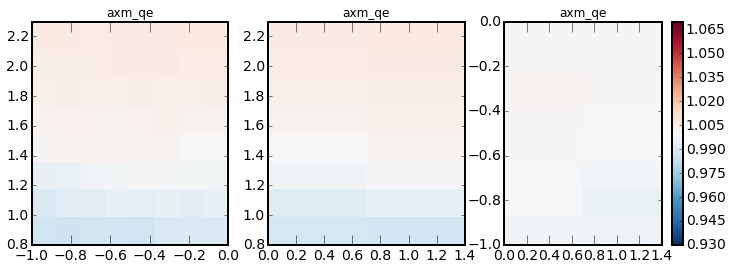

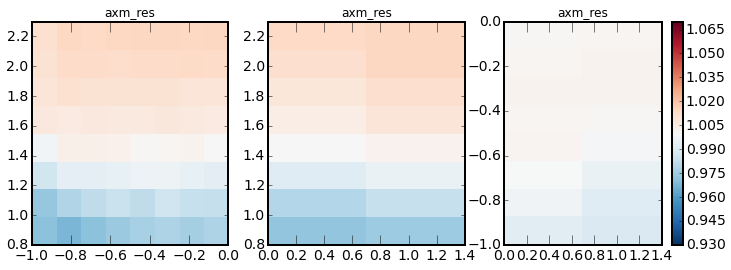

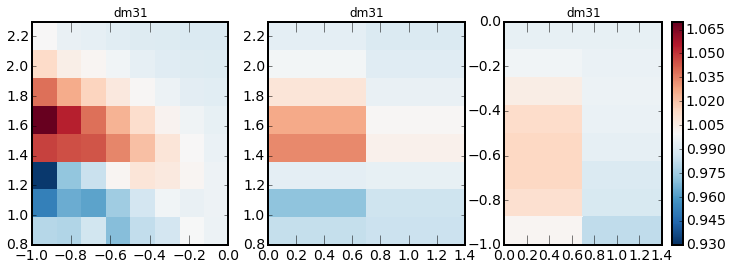

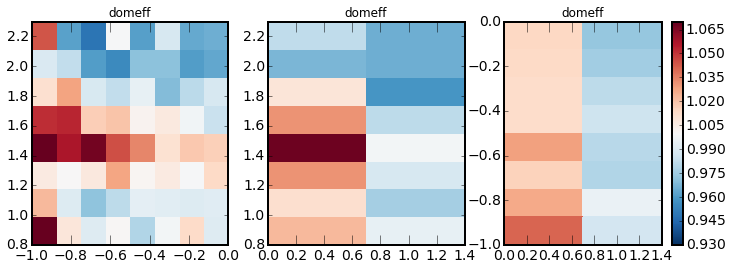

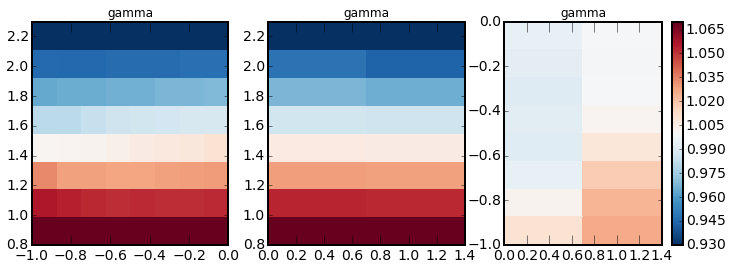

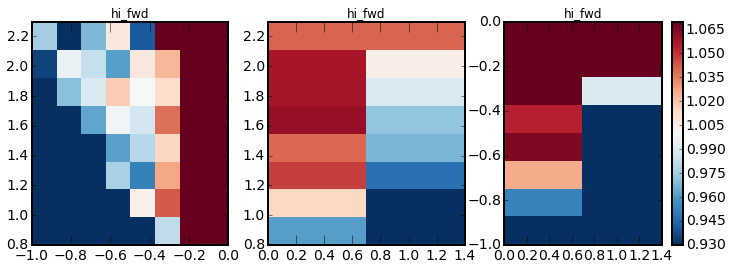

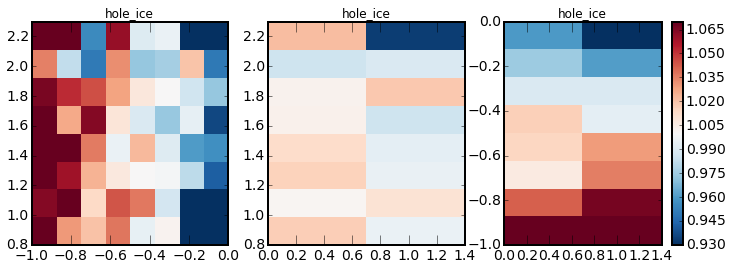

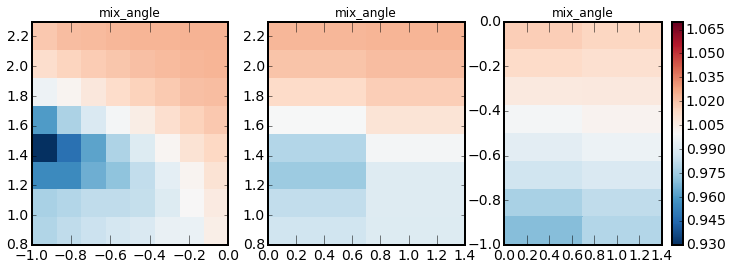

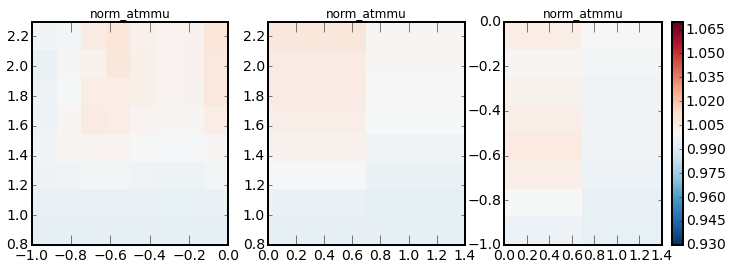

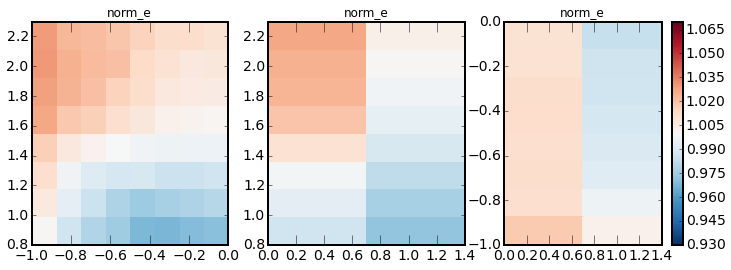

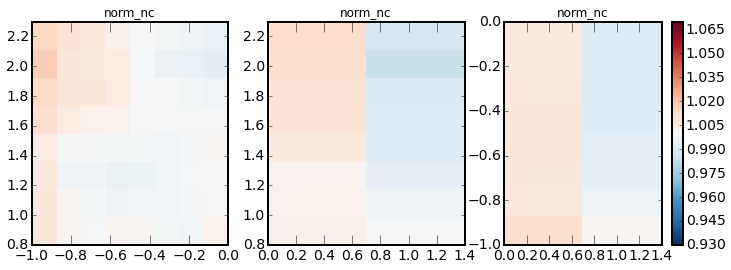

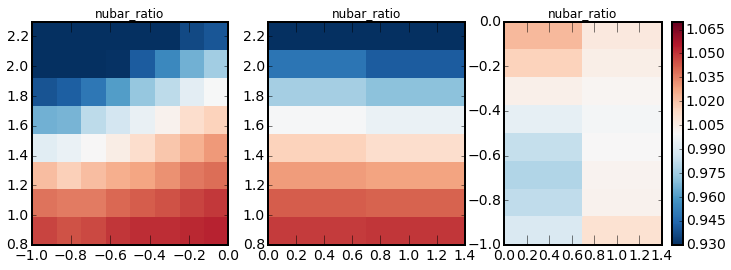

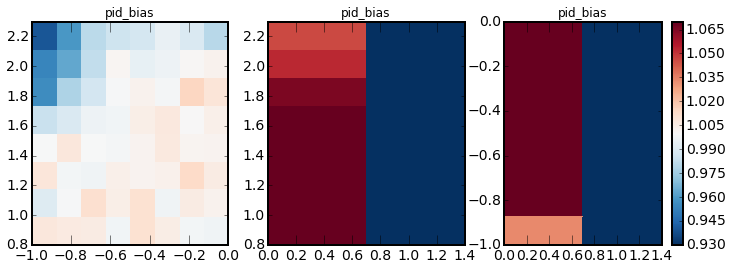

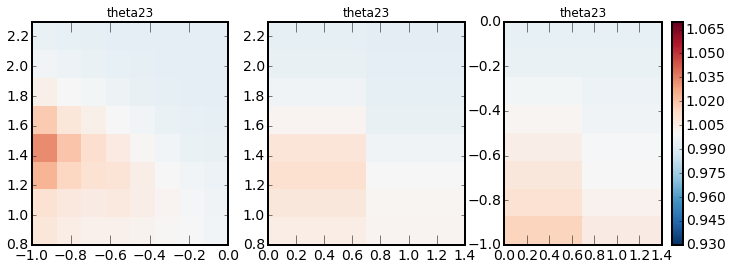

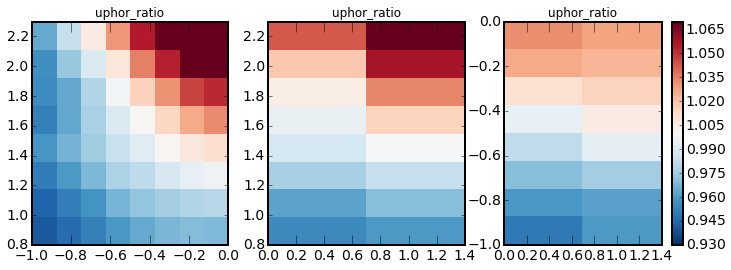

In [13]:
myaxis = [2,1,0]
myaxr = [[1,0],[2,0],[2,1]]
figures = []
for one_var in skeys:
    figures.append(figure(figsize=(12,4)))
    for i in range(len(myaxis)):
        figures[-1].add_subplot(1,3,i+1)
        plt.title(one_var)
        ratio = (np.sum(var_histos[one_var][0],axis=myaxis[i])/
                np.sum(fnominal,axis=myaxis[i]))
        plt.pcolor(mybin_edges[myaxr[i][0]], 
                   mybin_edges[myaxr[i][1]],
                   ratio, cmap='RdBu_r',vmin = 0.93, vmax = 1.07)
        plt.xlim([mybin_edges[myaxr[i][0]].min(), 
                  mybin_edges[myaxr[i][0]].max()])
        plt.ylim([mybin_edges[myaxr[i][1]].min(), 
                  mybin_edges[myaxr[i][1]].max()])
    plt.colorbar()
        #plt.pcolor(ratio)
#doFigures()  